# Surveillance in NYC

The median of the decoders' counts for each type of camera for each intersection. 
Contains aggregated counts over all intersections characterised by a unique PanoramaId. 



__Columns:__

- PanoramaId: ID unique to the Street View panorama of the intersection.
The following columns describe the median number of cameras at the intersection according to the 3 decoders:
    -  n_cameras_median: Total number of cameras.
    - attached_street_median: Number of cameras that is attached to a street_light/traffic_signal/road_sign.
    - attached_building_median: Number of cameras that is attached to a building.
    - attached_unknown_median: Number of cameras that is attached to an unknown location.
    - type_dome_median: Number of cameras of dome type.
    - type_bullet_median: Number of cameras of bullet type.
    - type_unknown_median: Number of cameras of unknown type.
The following columns represent the level of agreement amongst the three decoders, this could be either: Unanimous or 2 vs 1 or All disagree:
    - n_cameras_agreement: Number of total cameras.
    - attached_street_agreement: Number of cameras attached to a street_light/traffic_signal/road_sign.
    - attached_building_agreement: Number of cameras attached to a building.
    - attached_unknown_agreement: Number of cameras of attached to an unknown location.
    - type_dome_agreement: Number of cameras of dome type.
    - type_bullet_agreement: Number of cameras of bullet type.
    - type_unknown_agreement: Number of cameras of unknown type.
- Lat: Latitude in degrees of the actual Street View panorama, from panorama_url.csv's GoogleLat, within [-90, 90].
- Long: Longitude in degrees of the actual Street View panorama, from panorama_url.csv's GoogleLong, within[-180, 180].
- geometry_pano: Point-geometry of the panorama for ease of plotting.
- BoroName: Name of the borough the specific intersection is found in, with respect to the query json from NYC.gov website.
- URL: URL of the Street View panorama.
- ImageDate: Date of photography of the Street View panorama.


In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('https://raw.githubusercontent.com/amnesty-crisis-evidence-lab/decode-surveillance-nyc/main/data/counts_per_intersections.csv')


In [344]:
data

,PanoramaId,n_cameras_median,attached_street_median,attached_building_median,attached_unknown_median,type_dome_median,type_bullet_median,type_unknown_median,n_cameras_agreement,attached_street_agreement,...,attached_unknown_agreement,type_dome_agreement,type_bullet_agreement,type_unknown_agreement,Lat,Long,geometry_pano,BoroName,URL,ImageDate
0,--48RnFczF55WcDFpy5y_Q,0,0,0,0,0,0,0,2 vs 1,Unanimous,...,Unanimous,Unanimous,Unanimous,Unanimous,40.870564,-73.869327,POINT (-73.86932652339482 40.87056425110688),Bronx,https://www.google.com/maps/@?api=1&map_action...,2019-08
1,--T2iuvfxXJrzbgD7R3W-g,0,0,0,0,0,0,0,2 vs 1,Unanimous,...,2 vs 1,Unanimous,Unanimous,Unanimous,40.669099,-73.762447,POINT (-73.76244689609075 40.6690985670363),Queens,https://www.google.com/maps/@?api=1&map_action...,2020-10
2,--VGAsqPgTXxgZFXuhuhbg,0,0,0,0,0,0,0,Unanimous,Unanimous,...,Unanimous,Unanimous,Unanimous,Unanimous,40.766790,-73.771211,POINT (-73.7712107859631 40.76679030231237),Queens,https://www.google.com/maps/@?api=1&map_action...,2020-11
3,--YJY0GGvay_3W_O5ObeNQ,0,0,0,0,0,0,0,2 vs 1,Unanimous,...,Unanimous,Unanimous,Unanimous,Unanimous,40.554253,-74.201603,POINT (-74.20160298846051 40.55425348634071),Staten Island,https://www.google.com/maps/@?api=1&map_action...,2019-09
4,--fUkaf5nn1-bm4KiJ9pVA,1,0,1,0,0,0,0,2 vs 1,Unanimous,...,Unanimous,Unanimous,Unanimous,Unanimous,40.611084,-74.162803,POINT (-74.16280280196275 40.61108412672856),Staten Island,https://www.google.com/maps/@?api=1&map_action...,2019-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43401,zzj23G_f-_hZa1LrXJ7tig,0,0,0,0,0,0,0,2 vs 1,2 vs 1,...,Unanimous,Unanimous,Unanimous,2 vs 1,40.889133,-73.821303,POINT (-73.82130317259254 40.88913324730224),Bronx,https://www.google.com/maps/@?api=1&map_action...,2019-11
43402,zzpZoM4JHrGNywYitkYT8w,1,0,0,0,0,0,0,2 vs 1,2 vs 1,...,Unanimous,2 vs 1,Unanimous,Unanimous,40.750994,-73.706451,POINT (-73.7064507165946 40.75099428476829),Queens,https://www.google.com/maps/@?api=1&map_action...,2019-07
43403,zztPjLBFQjwEISsA75a-zg,1,1,0,0,1,0,0,All disagree,All disagree,...,Unanimous,All disagree,2 vs 1,Unanimous,40.730852,-73.947876,POINT (-73.9478762022405 40.73085200510598),Brooklyn,https://www.google.com/maps/@?api=1&map_action...,2020-10
43404,zzv84J0v5tQobN5uCXO1xw,0,0,0,0,0,0,0,2 vs 1,Unanimous,...,Unanimous,Unanimous,Unanimous,Unanimous,40.675203,-73.778650,POINT (-73.77864970575715 40.67520299190087),Queens,https://www.google.com/maps/@?api=1&map_action...,2018-07


In [347]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43406 entries, 0 to 43405
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PanoramaId                   43406 non-null  object 
 1   n_cameras_median             43406 non-null  int64  
 2   attached_street_median       43406 non-null  int64  
 3   attached_building_median     43406 non-null  int64  
 4   attached_unknown_median      43406 non-null  int64  
 5   type_dome_median             43406 non-null  int64  
 6   type_bullet_median           43406 non-null  int64  
 7   type_unknown_median          43406 non-null  int64  
 8   n_cameras_agreement          43406 non-null  object 
 9   attached_street_agreement    43406 non-null  object 
 10  attached_building_agreement  43406 non-null  object 
 11  attached_unknown_agreement   43406 non-null  object 
 12  type_dome_agreement          43406 non-null  object 
 13  type_bullet_agre

,n_cameras_median,attached_street_median,attached_building_median,attached_unknown_median,type_dome_median,type_bullet_median,type_unknown_median,Lat,Long
count,43406.000000,43406.000000,43406.000000,43406.000000,43406.000000,43406.000000,43406.000000,43393.000000,43393.000000
mean,0.667051,0.076418,0.509906,0.001981,0.052205,0.010229,0.001451,40.705407,-73.919526
std,1.291749,0.349684,1.162495,0.046987,0.292348,0.118690,0.042638,0.089334,0.119303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.498952,-74.254909
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.636026,-73.980610
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.703861,-73.908354
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.762550,-73.832685
max,17.000000,8.000000,16.000000,2.000000,8.000000,5.000000,3.000000,40.912493,-73.700371


### Plot attached volunteer agreements to attached street medium frequency chart 

The following columns represent the level of agreement amongst the three decoders, this could be either: Unanimous or 2 vs 1 or All disagree


In [235]:
from plotnine import ggplot, aes, geom_histogram, facet_wrap, theme, ylab, element_text

#creating a copy of the dataframe with two interested columns 
to_plot = data[["attached_street_agreement", "attached_street_median"]].copy()
to_plot

,attached_street_agreement,attached_street_median
0,Unanimous,0
1,Unanimous,0
2,Unanimous,0
3,Unanimous,0
4,Unanimous,0
...,...,...
43401,2 vs 1,0
43402,2 vs 1,0
43403,All disagree,1
43404,Unanimous,0


In [236]:
# renaming column titles 
to_plot.columns = ["Agreement", "Median"]
#to_plot.head(1)


# --------------------------------------------------------------

# This class is useful for specifying the type of Categorical data 
# independent of the values, with categories and orderness. 
# resource: https://pandas.pydata.org/docs/reference/api/pandas.CategoricalDtype.html#:~:text=Type%20for%20categorical%20data%20with%20the%20categories%20and%20orderedness.&text=Must%20be%20unique%2C%20and%20must,that%20index%20will%20be%20used.
# https://stackoverflow.com/questions/68393620/what-is-the-difference-between-astypecategory-and-astypecategoricaldtype

# creating a separate list with categories that exist in "agreement" feature
agreement_type = pd.CategoricalDtype(
    categories=["Unanimous", "2 vs 1", "All disagree"],
    ordered=True
)


In [296]:
# Original Example
# instatiating a relationship between the to_plot copy dataframe to the 
# categoricalDtype so "Agreement" values are registered as ordered categories
# to_plot["Agreement"] =  to_plot["Agreement"].astype(agreement_type)
# to_plot["Agreement"] --> Categories (3, object): ['Unanimous' < '2 vs 1' < 'All disagree']

# (ggplot(to_plot, aes("Agreement")) 
# + geom_histogram(aes(fill="Median"), color="white", binwidth=1)
# + facet_wrap("Median", scales="free_y", labeller="label_both")
# + ylab("Intersections")
# + theme(
    
#     subplots_adjust={'wspace': 0.5},
#     axis_text_x = element_text(angle=45, ha="right"),
#     dpi=200,
#     legend_position="none"
# ))

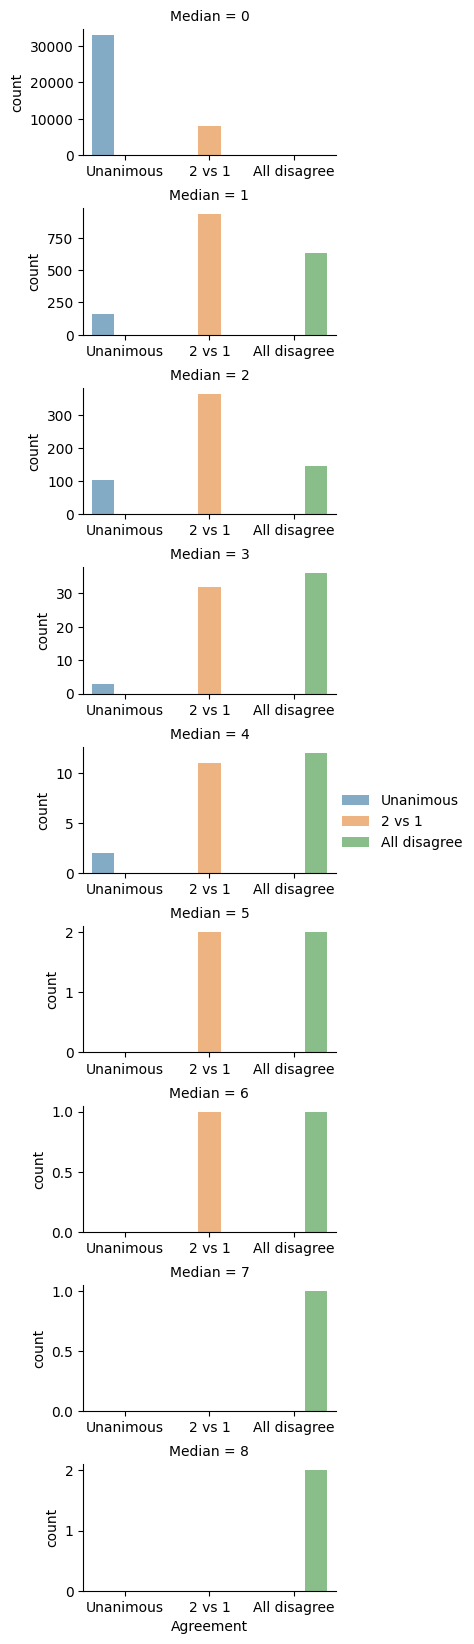

In [348]:
# Resource: https://stackoverflow.com/questions/46355229/how-to-make-facegrid-countplot-hue-bars-side-by-side
g = sns.FacetGrid(to_plot, row='Median',  height=2, aspect=1.5,sharex=False, sharey=False)
g.map_dataframe(sns.countplot, 'Agreement',hue='Agreement', alpha=.6, 
                palette=sns.color_palette())

g.fig.subplots_adjust(top=0.9, left=0.1)
g.set_xlabels('Agreement')
g.add_legend()

plt.show()              

In [299]:
median_columns = [x for x in data.columns if x.endswith("median")]
median_columns

['n_cameras_median',
 'attached_street_median',
 'attached_building_median',
 'attached_unknown_median',
 'type_dome_median',
 'type_bullet_median',
 'type_unknown_median']

#### pandas.melt()
    1) Pandas melt() function is used to change the DataFrame format 
    from wide to long
    
         A dataset can be written in two different formats: wide and long. A wide format contains values that do not repeat in the first column. A long format contains values that do repeat in the first column. Notice that in the wide dataset, each value in the first column is unique.Dec 8, 2021

    2) It's used to create a specific format of the DF object where 
    one or more columns work as identifiers 

    3) All the remaining columns are treated as values and unpivoted 
    to the row axis and only two columns - variable and value. 

    4) We can use pivot() function to unmelt the output dataframe back to the original dataframe

In [354]:
#https://www.geeksforgeeks.org/python-pandas-melt/
final_long_data = data.reset_index().melt(id_vars = ["PanoramaId", "BoroName"],
                       value_vars = median_columns,
                       var_name = "subset",
                       value_name = "count"
                       )
#final_long_data
# removing median ending from subset feature
final_long_data["subset"] = final_long_data["subset"].str.replace("_median", "")
final_long_data

,PanoramaId,BoroName,subset,count
0,--48RnFczF55WcDFpy5y_Q,Bronx,n_cameras,0
1,--T2iuvfxXJrzbgD7R3W-g,Queens,n_cameras,0
2,--VGAsqPgTXxgZFXuhuhbg,Queens,n_cameras,0
3,--YJY0GGvay_3W_O5ObeNQ,Staten Island,n_cameras,0
4,--fUkaf5nn1-bm4KiJ9pVA,Staten Island,n_cameras,1
...,...,...,...,...
303837,zzj23G_f-_hZa1LrXJ7tig,Bronx,type_unknown,0
303838,zzpZoM4JHrGNywYitkYT8w,Queens,type_unknown,0
303839,zztPjLBFQjwEISsA75a-zg,Brooklyn,type_unknown,0
303840,zzv84J0v5tQobN5uCXO1xw,Queens,type_unknown,0


In [355]:
# Download updated data 
final_long_data.to_csv('final_long_data_updated.csv')

### Summary of camera counts 

In [334]:
subset_count_fld =  final_long_data[['subset', 'count']]

counts_per_subset = subset_count_fld.groupby("subset").sum()
counts_per_subset

,count
subset,
attached_building,22133
attached_street,3317
attached_unknown,86
n_cameras,28954
type_bullet,444
type_dome,2266
type_unknown,63


In [349]:
# The loc() function helps us to retrieve data values from a dataset at an ease. Using the loc() function, we can access the data values fitted in the particular row or column based on the index value passed to the function.

total_cameras = counts_per_subset.loc[['attached_building', 'attached_street', 'attached_unknown']].sum() 
total_cameras

count    25536
dtype: int64

In [338]:
# Percentage of total cameras by attached building, attached street, or unknown

counts_per_subset.loc[['attached_building','attached_street','attached_unknown']] * 100 / total_cameras

,count
subset,
attached_building,86.673716
attached_street,12.989505
attached_unknown,0.336779


In [351]:
# Total count of type of camera

counts_per_subset.loc[["type_bullet", "type_dome", "type_unknown"]]

,count
subset,
type_bullet,444
type_dome,2266
type_unknown,63


In [350]:
counts_per_subset.loc[["type_bullet", "type_dome", "type_unknown"]] * 100 / total_cameras

,count
subset,
type_bullet,1.738722
type_dome,8.873747
type_unknown,0.246711
